# Lab 01
---------------------------
Maurice Woods - Aerospace Engineering Masters Student (Control Systems)

ECEN 5002 Communications Lab

26 Jan 2017

### Goals of this Lab

* Learn how to approximate CT signals by DT sequences in Python.
* DT approximations to integration and differentiation of signals in Python.
* Generation of binary unipolar flat-top PAM from ASCII text string.
* Build a receiver for text strings transmitted using flat-top PAM.
* Generate and receive PCM signals.
-------------------------------

## Lab Experiments
### E1 - Signals In Python
##### Part A.)



In [1]:
from pylab import *
from ast import literal_eval
%matplotlib inline
#plt.rc('text', usetex=True) 

import matplotlib.pyplot as plt
import numpy as np
from quickplot import quickplot

debug = 'OFF'

plt.close('all')

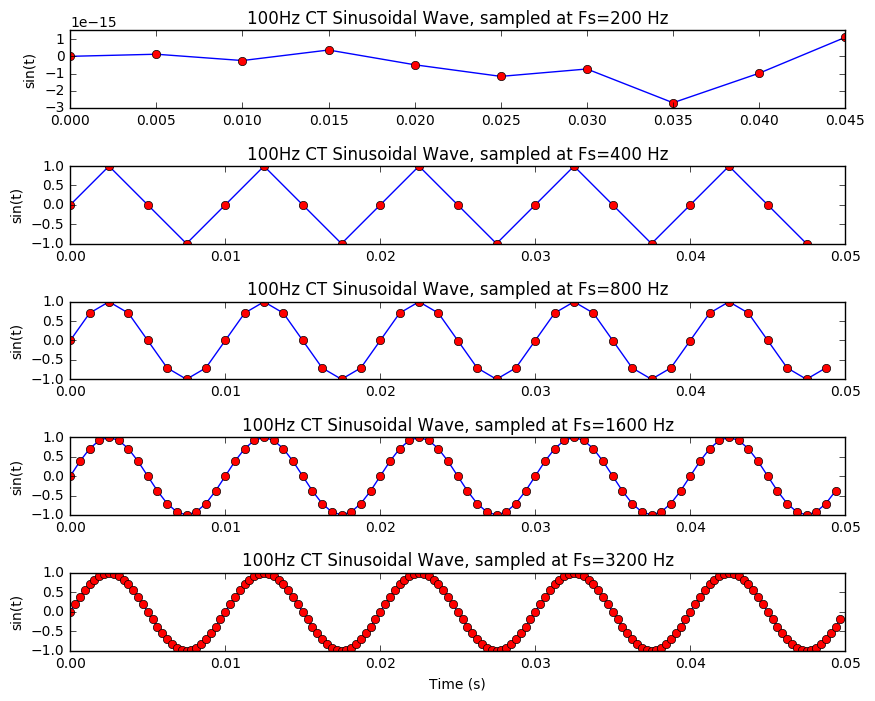

In [2]:
from sine100 import sampler

sampleFreq=[200,400,800,1600,3200]
plt.figure(1,figsize=(10,8))
for f in range(0,len(sampleFreq)):
    Fs,tt,st = sampler(sampleFreq[f])
    plt.subplot(511+f)
    plt.subplots_adjust(hspace=0.75)
    plt.plot(tt,st,'b-',tt,st,'ro')
    plt.title("100Hz CT Sinusoidal Wave, sampled at Fs=%d Hz" % (sampleFreq[f]))
    plt.ylabel("sin(t)")
plt.xlabel('Time (s)')
plt.show()

The smallest Fs which yields a "nice", representative graph of a 100Hz CT sinusoid is Fs=800Hz

---------------------
##### Part B.)

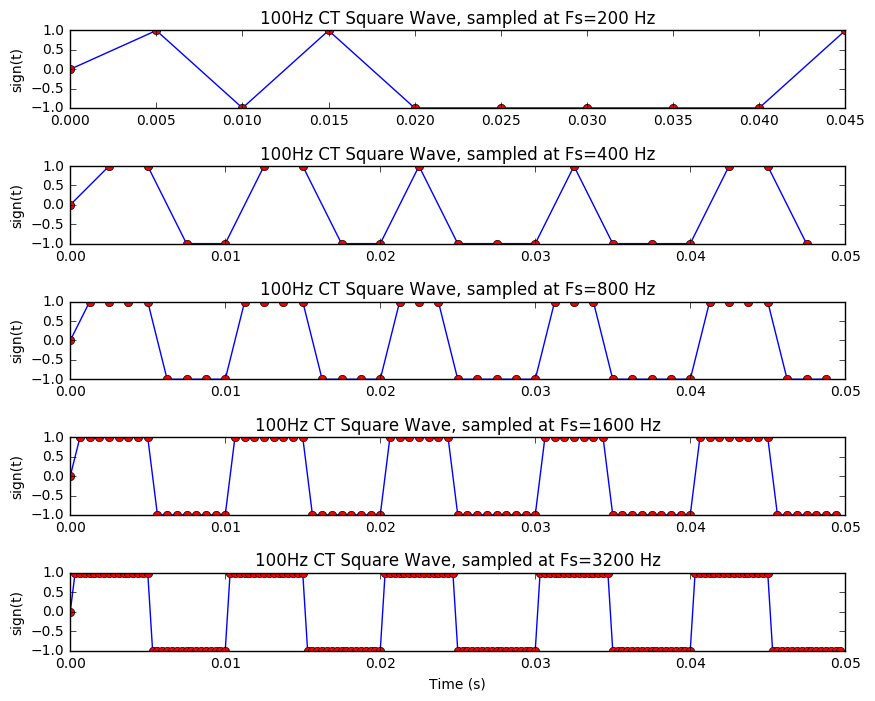

In [3]:
plt.figure(2,figsize=(10,8))
for f in range(0,len(sampleFreq)):
    Fs,tt,st = sampler(sampleFreq[f])
    rt = sign(st)
    plt.subplot(511+f)
    plt.subplots_adjust(hspace=0.75)
    plt.plot(tt,rt,'b-',tt,rt,'ro')
    plt.title("100Hz CT Square Wave, sampled at Fs=%d Hz" % (sampleFreq[f]))
    plt.ylabel('sign(t)')
plt.xlabel('Time (s)')
plt.show()

The smallest Fs which yields a "nice", representative graph of a 100Hz CT rectangular signal is, again, Fs=1600Hz

---------------
##### Part C.)

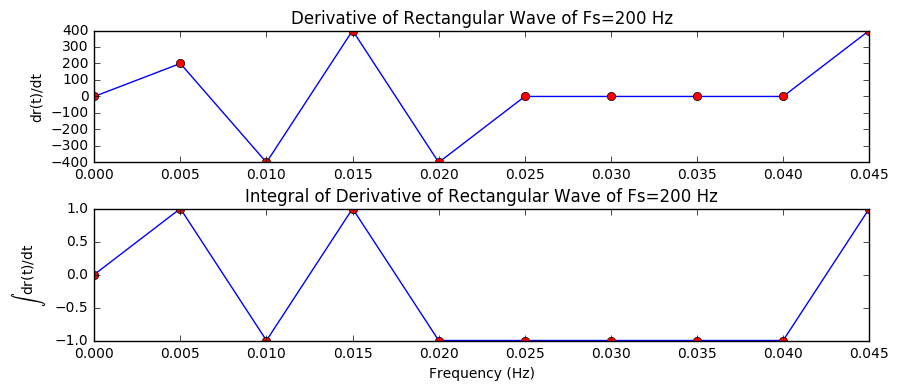

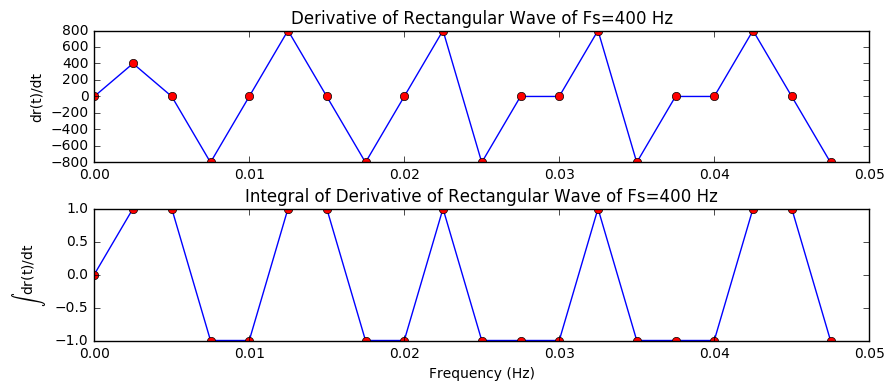

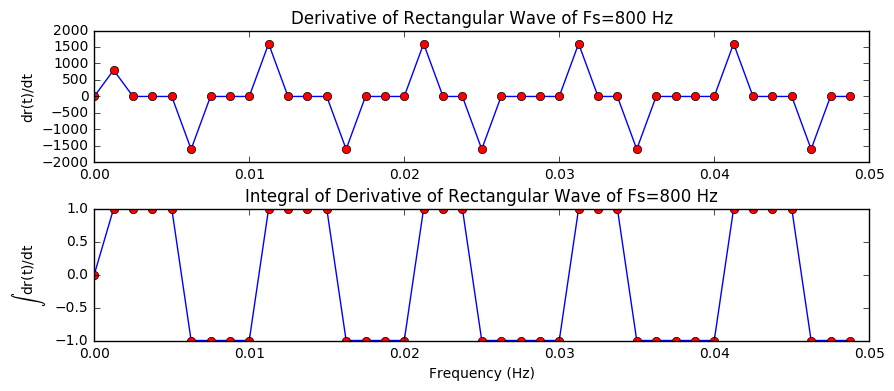

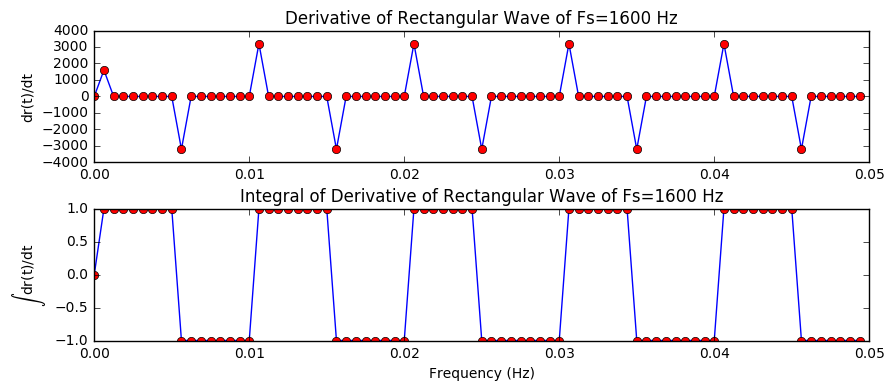

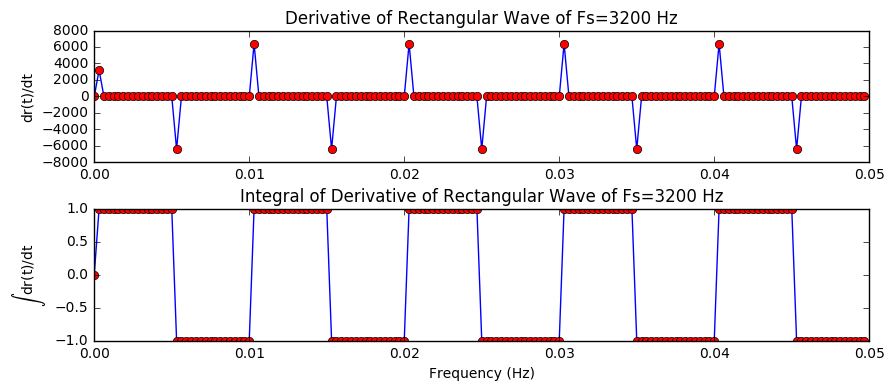

In [4]:
#plt.figure(3,figsize=(10,8))
for f in range(0,len(sampleFreq)):
    plt.figure(1,figsize=(10,4))
    Fs,tt,st = sampler(sampleFreq[f])
    rt = sign(st)
    if debug is 'ON':
        print(rt)
        print(hstack((0,rt)))
        print(diff(hstack((0,rt))))
    rdt = diff(hstack((0,rt)))*Fs
    plt.subplot(211)
    plt.subplots_adjust(hspace=0.35)
    plt.plot(tt,rdt,'b-',tt,rdt,'ro')
    plt.title("Derivative of Rectangular Wave of Fs=%d Hz" % (sampleFreq[f]))
    plt.ylabel("dr(t)/dt")
    
    rdit = cumsum(rdt)/float(Fs)
    plt.subplot(212)
    plt.plot(tt,rdit,'b-',tt,rdit,'ro')
    plt.title("Integral of Derivative of Rectangular Wave of Fs=%d Hz" % (sampleFreq[f]))
    plt.ylabel("$\int$ dr(t)/dt")
    
    plt.xlabel('Frequency (Hz)')
    plt.show()
    print("\n\n")

Again, the sampling frequency Fs that produces a nice representation of the derivative is about 1600Hz

----------------------
##### Part D.)

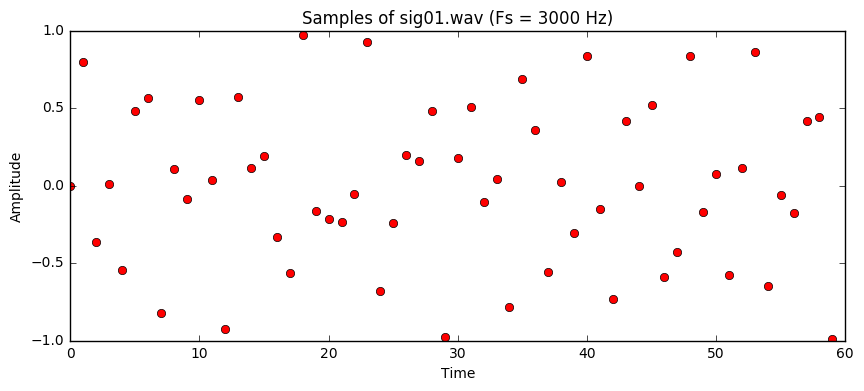

In [5]:
from wavfun import wavread
wave, framerate = wavread('sig01.wav')

tt = arange(0,round(len(wave)*framerate))/float(framerate)
quickplot(range(0,len(wave)),wave,'Time','Amplitude','Samples of sig01.wav (Fs = %d Hz)' % (framerate),'ro')


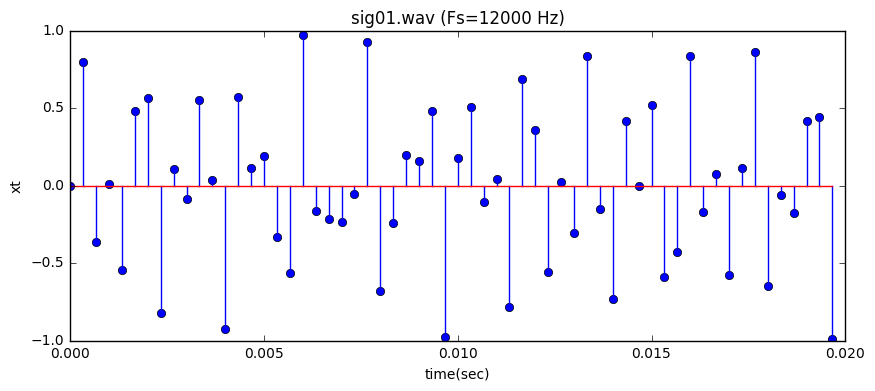

Multiplier:4


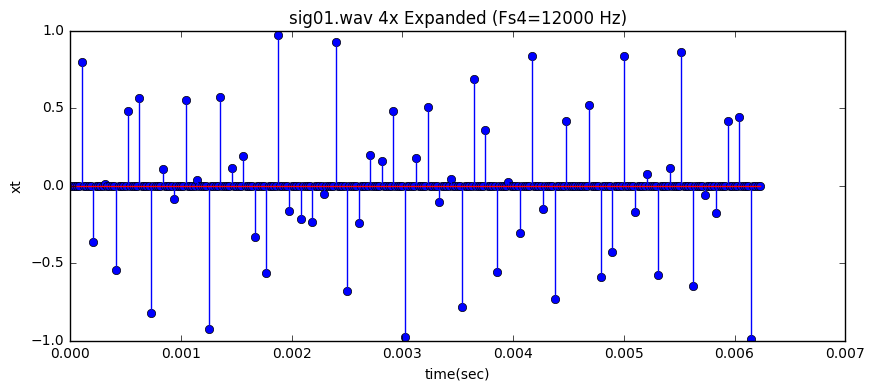

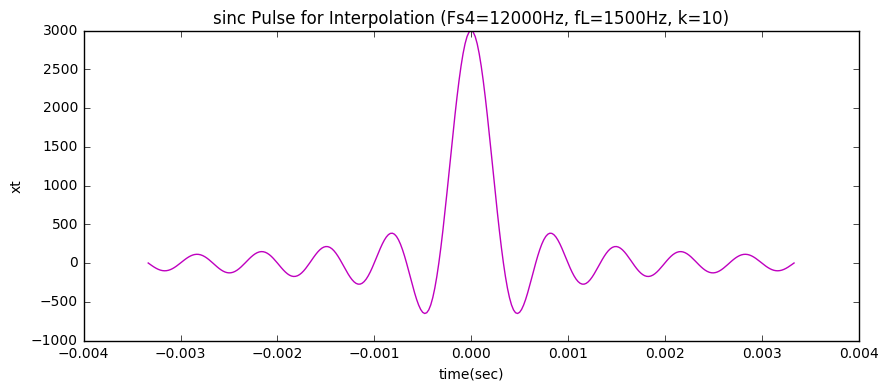

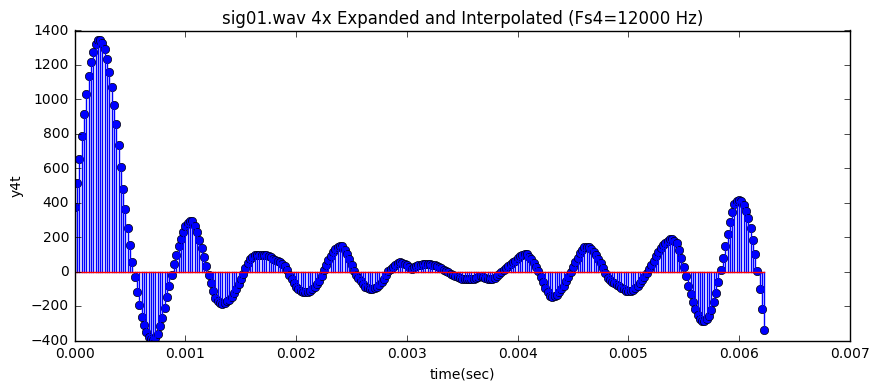

In [6]:
from wavSampler import wavSampler
fL=1500
k=10
wavSampler(12000,'sig01.wav',fL,k)
#wave, framerate = wavread('sig01.wav')
#sampleFreq=[800,1600,3200,6400,12800]
#plt.figure(1,figsize=(10,8))
#for f in range(0,len(sampleFreq)):   
#    plt.subplot(511+f)
#    plt.subplots_adjust(hspace=0.75)
#    plt.plot(tt,samplewave,'b-',tt,samplewave,'ro')
#    plt.title("sig01.wav, sampled at Fs=%d Hz" % (sampleFreq[f]))
#plt.xlabel('Time (s)')
#plt.show()

--------------------------
### E2 - Flat-Top PAM
##### Part A.)

In [7]:
from pylab import *
from ast import literal_eval

In [8]:
from ftpam01 import *
import ascfun

"Test" = 


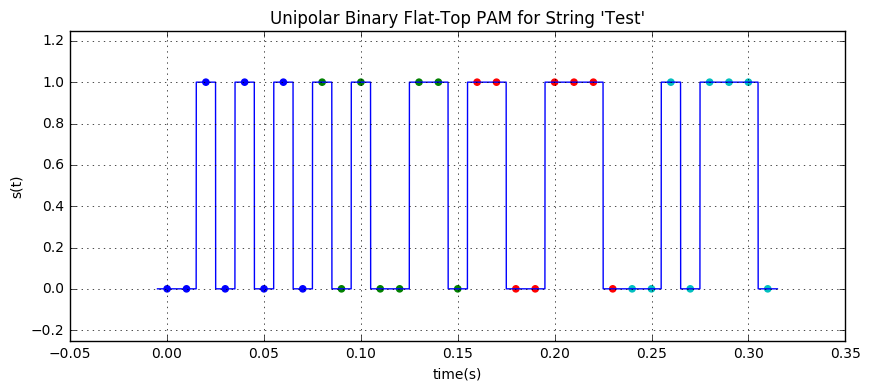

Outputting file as "Test.wav"


"Maurice!" = 


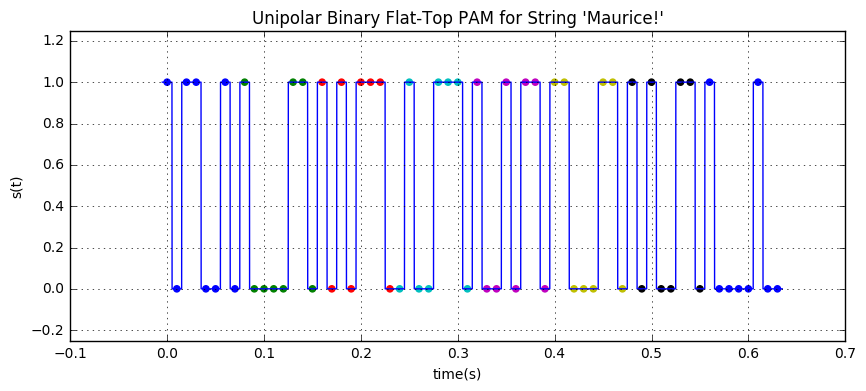

NOTE: String is not alphanumeric...

Outputting file as "ascii2wav.wav"




In [9]:
ascii2ftpam("Test",8,"export")
ascii2ftpam("Maurice!",8,"export")

--------------
##### Part B.)

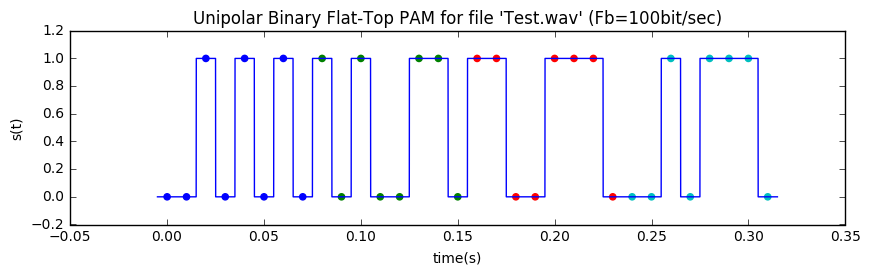

The file "Test.wav" reads: 
Test


In [10]:
from ftpam_rcvr01 import wav2ascii

wav2ascii("Test.wav",8)

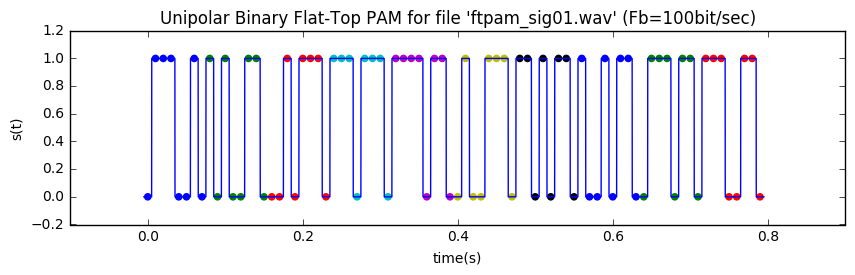

The file "ftpam_sig01.wav" reads: 
Networking


In [11]:
wav2ascii("ftpam_sig01.wav",8)

---------------
##### Part C.)

Translating the ftpam_sig02.wav file to ASCII

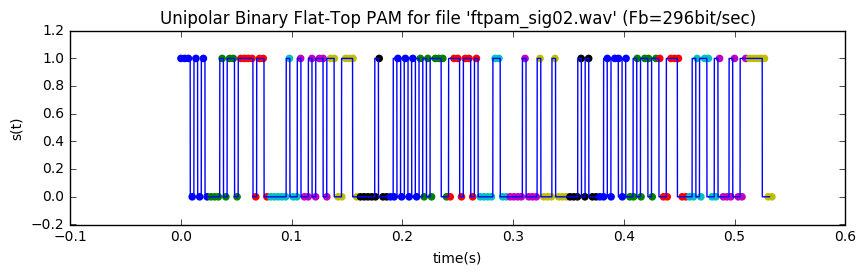

The file "ftpam_sig02.wav" reads: 
Who is Tu¶0(´´94


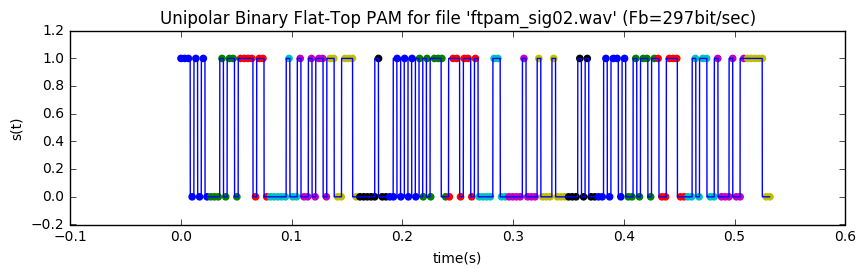

The file "ftpam_sig02.wav" reads: 
Who is Tu¶0(´´94


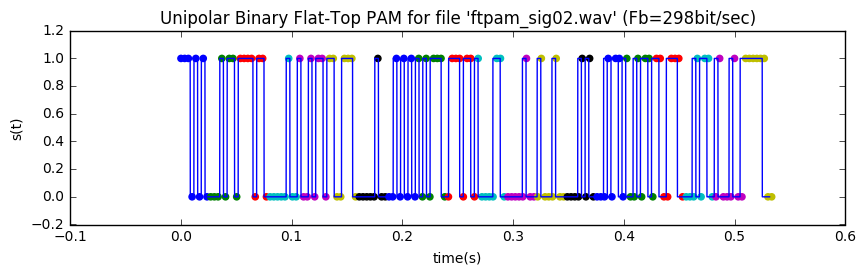

The file "ftpam_sig02.wav" reads: 
Who is Tuna "Phish"?


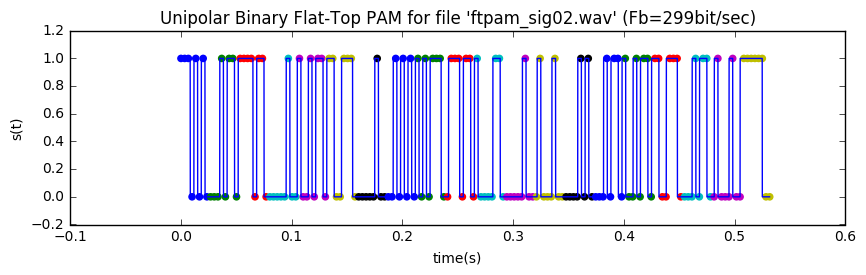

The file "ftpam_sig02.wav" reads: 
Who is Tuna "Phish"?


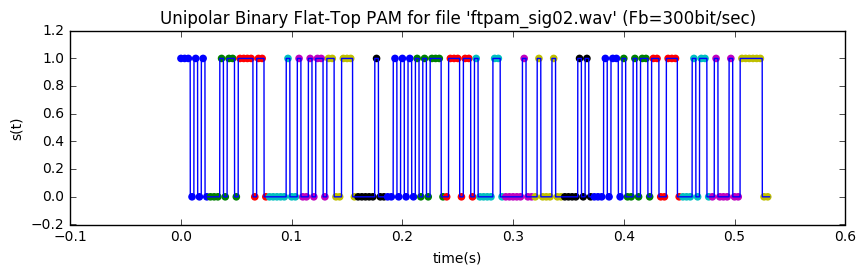

The file "ftpam_sig02.wav" reads: 
Who is Tuna "Phish"?


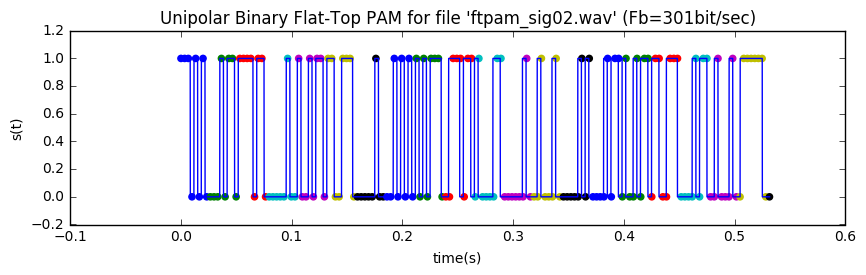

The file "ftpam_sig02.wav" reads: 
Who is TuÜÂ@D ÐÒæÐD~


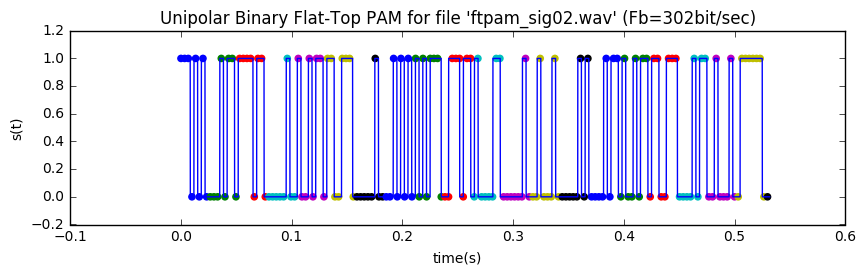

The file "ftpam_sig02.wav" reads: 
Who is TuÜÂ@D ÐÒæÐD~


In [12]:
Fb=296
for i in range(0,7):
    wav2ascii("ftpam_sig02.wav",8,Fb+i)

The translation only works for Fb = 298 to 300 (found by first testing Fb = 100, 200, 300, 400, and 500). This is a very narrow range, making it both difficult to pinpoint (without getting lucky by guessing that the bitrate was a multiple of 100) and crutial for decyphering the message (the message is almost completely unrecognizable outside of this range)

Translating the ftpam_sig03.wav file to ASCII

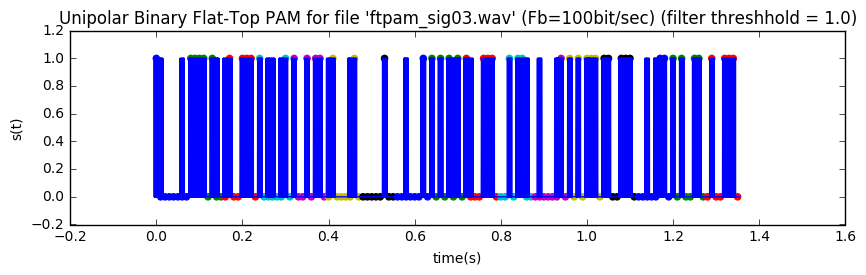

The file "ftpam_sig03.wav" reads: 
/rAiB @Uq4@us`er


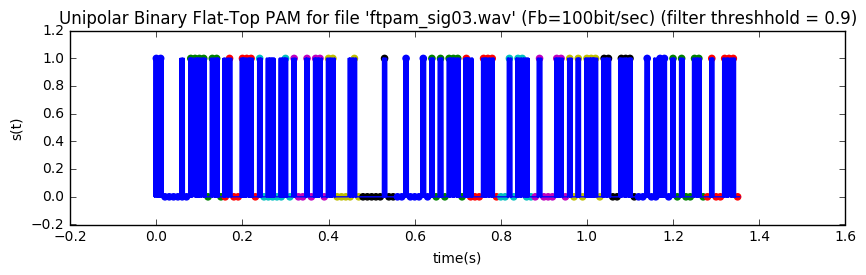

The file "ftpam_sig03.wav" reads: 
orAiC Duq4busder


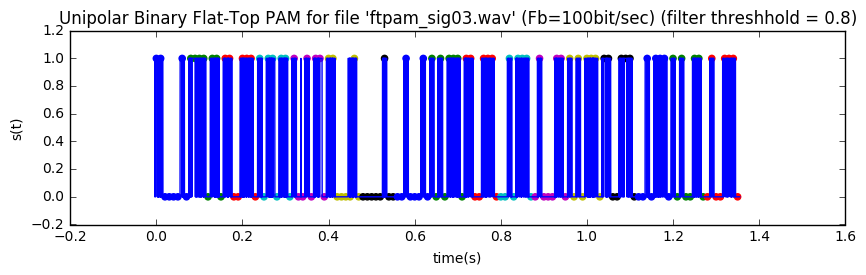

The file "ftpam_sig03.wav" reads: 
CosmiC Dustbuster


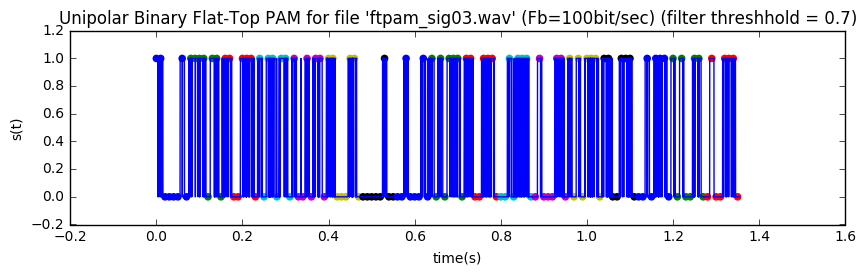

The file "ftpam_sig03.wav" reads: 
Cosmic Dustbuster


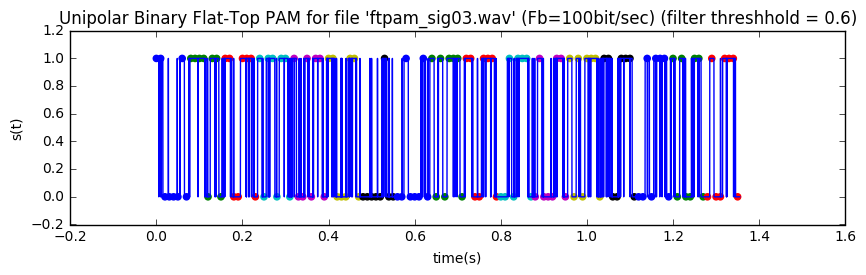

The file "ftpam_sig03.wav" reads: 
Cosmic Dustbuster


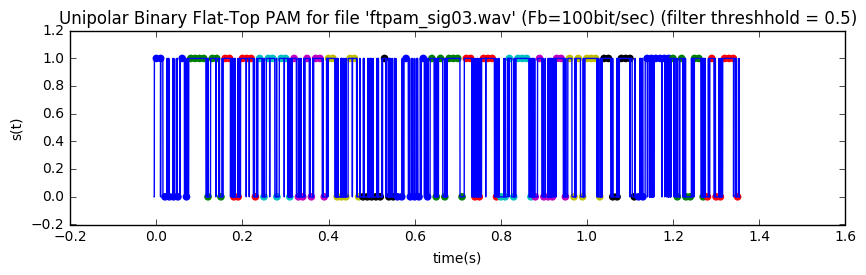

The file "ftpam_sig03.wav" reads: 
Cosmic Dustbusüer


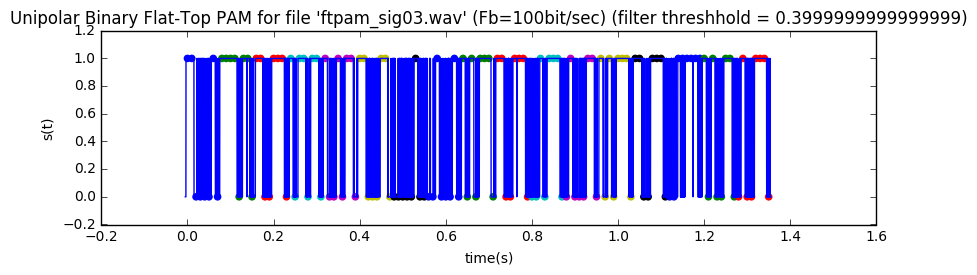

The file "ftpam_sig03.wav" reads: 
Cosmic Dustbusüer


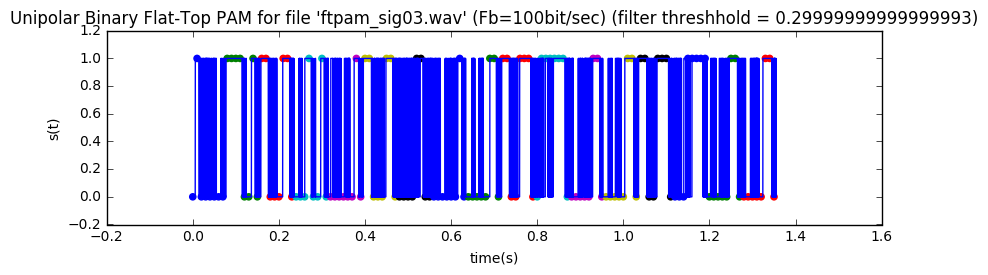

The file "ftpam_sig03.wav" reads: 
OcH@c0@`s~``sø``


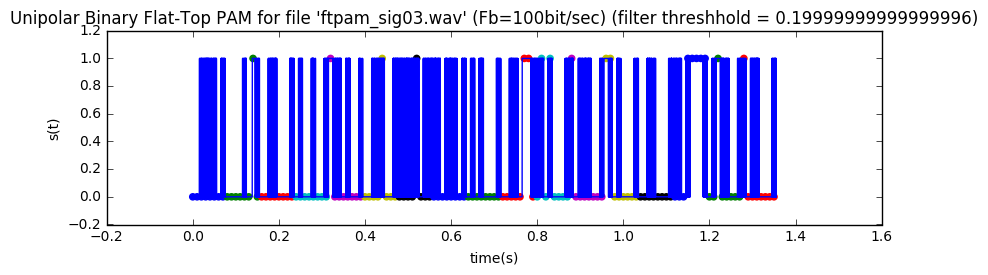

The file "ftpam_sig03.wav" reads: 
 @    `
 ø


In [13]:
thresh=1
for i in range(0,9):
    wav2ascii("ftpam_sig03.wav",8,100,"lp",thresh-(0.1*i))


The message contained within "ftpam_sig03.wav" is "Cosmic Dustbuster", which is readable with a filter threshold of between 0.6 to 0.7

------------------
### E3 - Pulse Code Modulation
##### Part A.)

In [1]:
from pylab import *
from ast import literal_eval
#%matplotlib inline
#plt.rc('text', usetex=True) 

import matplotlib.pyplot as plt
import numpy as np
from quickplot import quickplot

debug = 'OFF'

plt.close('all')

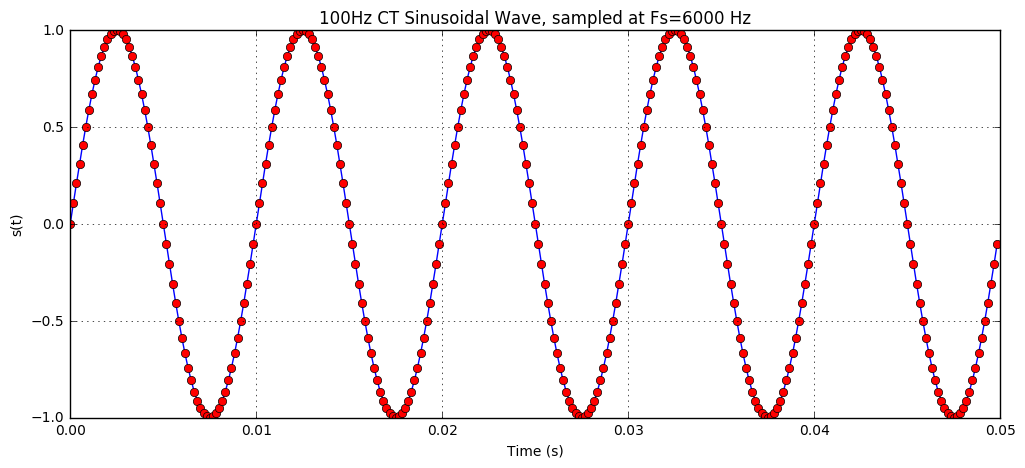

In [2]:
from sine100 import sampler

Fs=6000
plt.figure(1,figsize=(12,5))
Fs,tt,mt = sampler(Fs)
plt.plot(tt,mt,'b-',tt,mt,'ro')
plt.title("100Hz CT Sinusoidal Wave, sampled at Fs=%d Hz" % Fs)
plt.ylabel("s(t)")
plt.xlabel('Time (s)')
plt.grid()
plt.show()

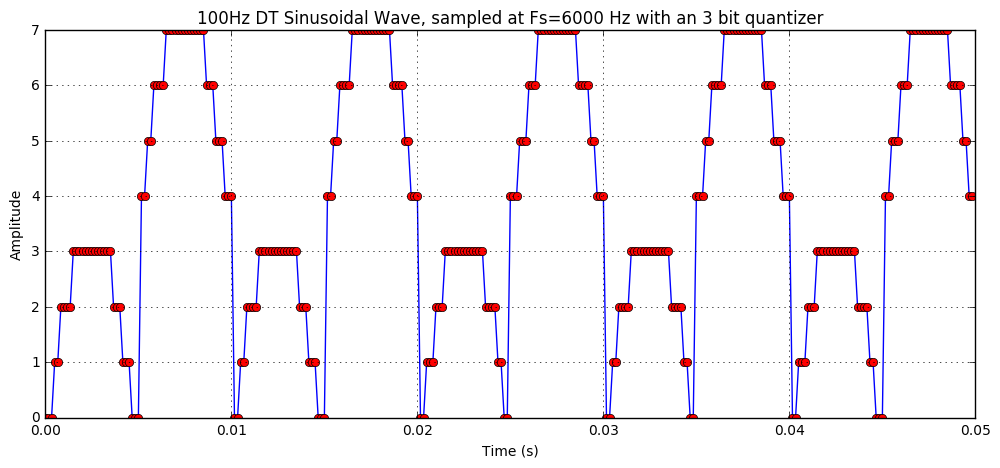

/home/mowoodsiii/Documents/Git/CUBoulderMasters/2017spring/CommsLab/Lab01/pcmfun.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  plt.plot(tt[(i*len(tt)/div):((i+1)*len(tt)/div)-1],st[(i*len(st)/div):((i+1)*len(tt)/div)-1],'b-')


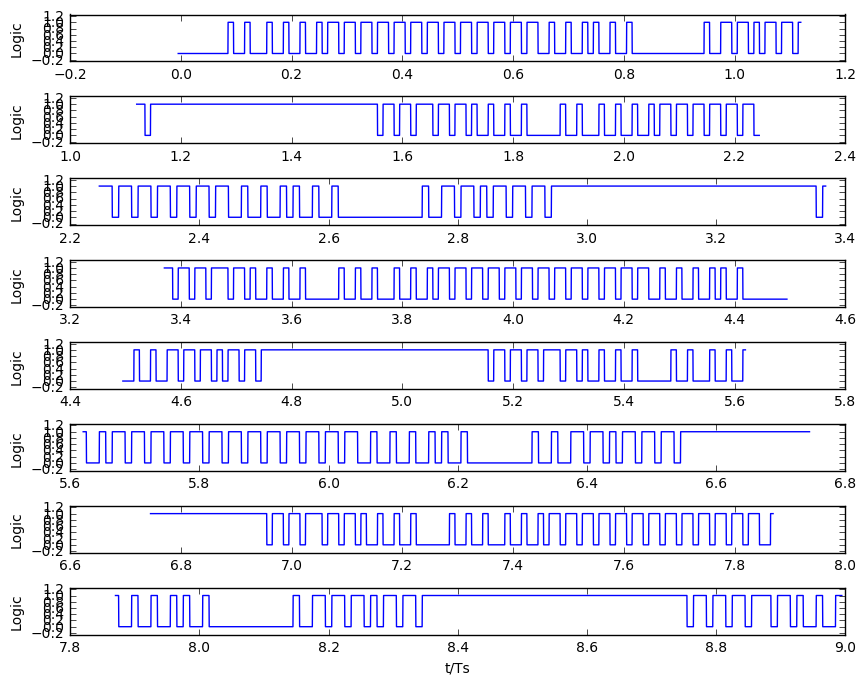

300


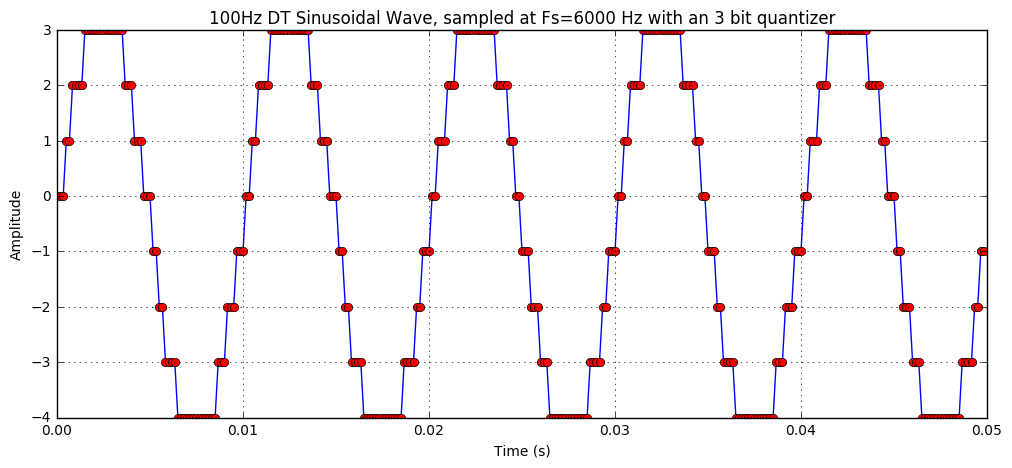

In [3]:
from pcmfun import *
A=1
st3=mt2pcm(mt,tt,Fs,3)
mt3=pcm2mt(st3,Fs,3)

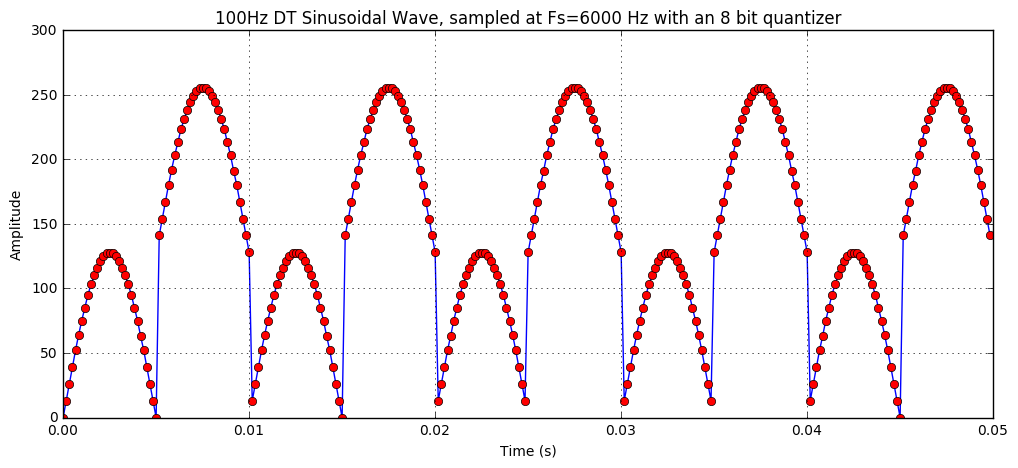

/home/mowoodsiii/Documents/Git/CUBoulderMasters/2017spring/CommsLab/Lab01/pcmfun.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  plt.plot(tt[(i*len(tt)/div):((i+1)*len(tt)/div)-1],st[(i*len(st)/div):((i+1)*len(tt)/div)-1],'b-')


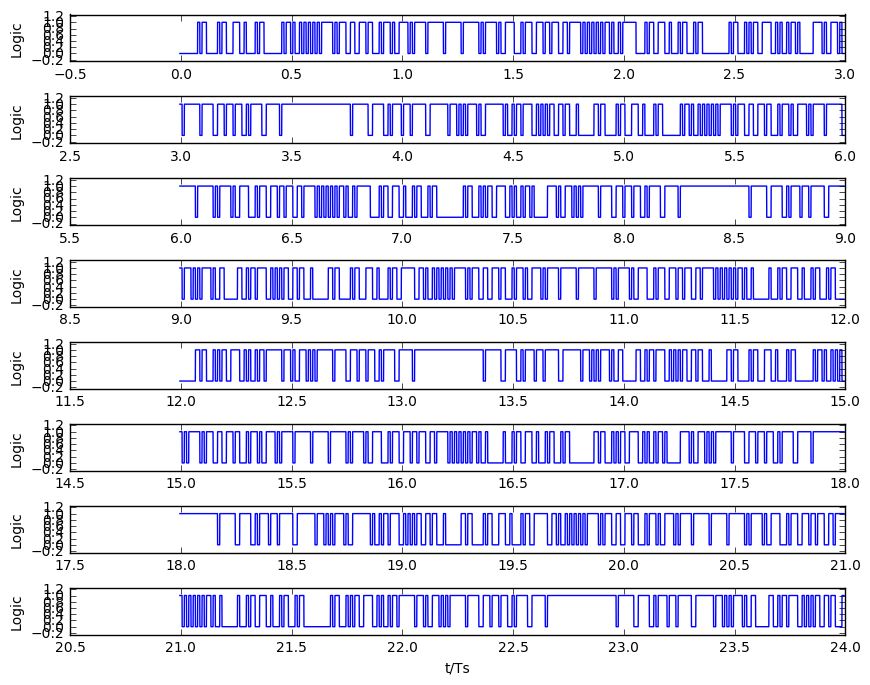

300


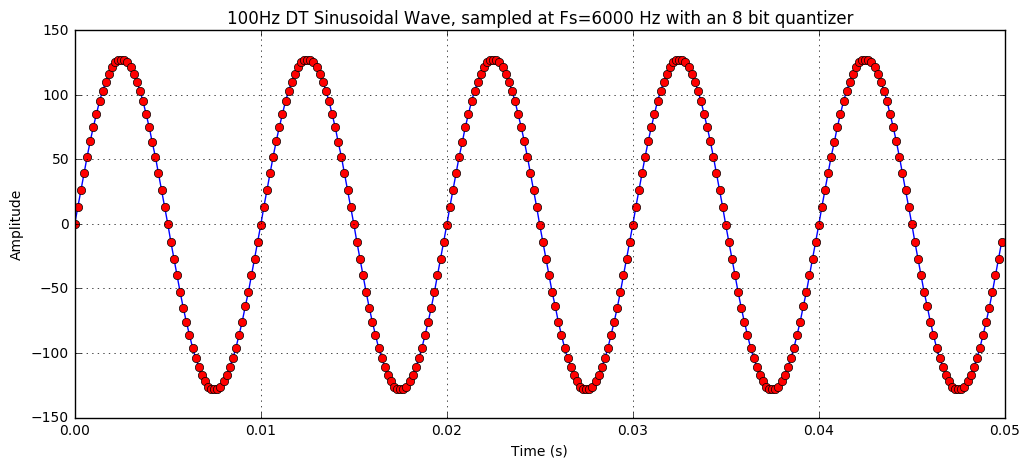

In [4]:
st8=mt2pcm(mt,tt,Fs,8)
mt8=pcm2mt(st8,Fs,8)

83200
83200


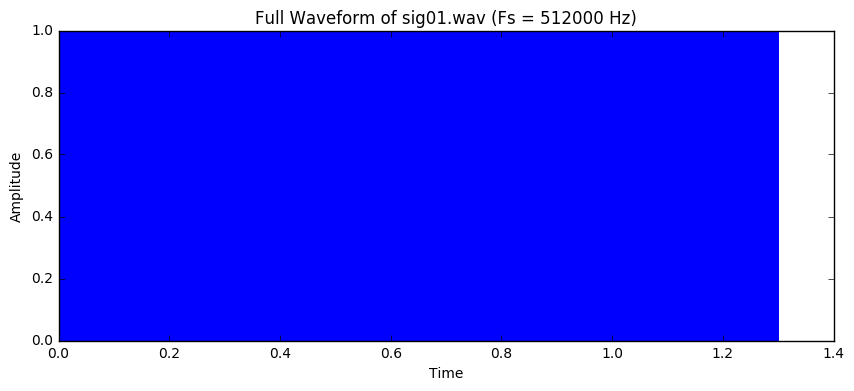

10400


In [27]:
from wavfun import wavread
Fb=64000
quant=8
rt, framerate = wavread('pcm_sig01.wav')
dataperbit = framerate/Fb

dnhat = around(rt[round(dataperbit/2)::int(dataperbit)]).astype(int)

tt = arange(0,len(dnhat))/float(Fb)
print(len(dnhat))
print(len(tt))

quickplot(tt,dnhat,'Time','Amplitude','Full Waveform of sig01.wav (Fs = %d Hz)' % (framerate))

textString,bitString = bin2asc(dnhat, quant)

mtt = arange(0,len(dnhat)/quant)/(float(Fb)/quant)
mt=unquantizer(bitString,quant)
print(len(mt))

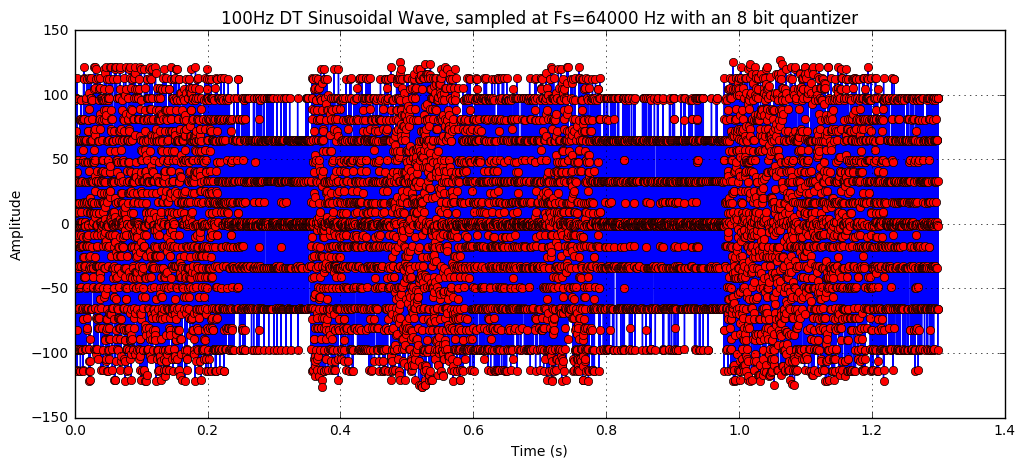

In [28]:
plt.figure(1,figsize=(12,5))
plt.plot(mtt,mt,'b-',mtt,mt,'ro')
plt.title("100Hz DT Sinusoidal Wave, sampled at Fs=%d Hz with an %d bit quantizer" % (Fb,quant))
plt.xlabel('Time (s)')
plt.ylabel("Amplitude")
plt.grid()
plt.show()

In [ ]:
fname="mtTest"
wavwrite(data, framerate, fname)